In [1]:
import numpy as np
import pandas as pd
import regex as re
import os
import sys
sys.path.insert(0,"../..")
from tools.DataManipulation import DataManipulation

In [2]:
# Importing multiple data files in dictionary
manipulator = DataManipulation()
data = manipulator.data_to_dict()

In [3]:
# Dataframe key names in dictionary
data.keys()

dict_keys(['status', 'races', 'sprint_results', 'seasons', 'constructors', 'circuits', 'constructor_standings', 'qualifying', 'results', 'constructor_results', 'lap_times', 'driver_standings', 'drivers', 'pit_stops'])

In [4]:
for key in data.keys():
    data[key].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1079 non-null   int64 
 1   year         1079 non-null   int64 
 2   round        1079 non-null   int64 
 3   circuitId    1079 non-null   int64 
 4   name         1079 non-null   object
 5   date         1079 non-null   object
 6   time         1079 non-null   object
 7   url          1079 non-null   object
 8   fp1_date     1079 non-null   object
 9   fp1_time     1079 non-null   object
 10  fp2_date     1079 non-null   object
 11  fp2_time     1079 non-null   object
 12  fp3_date

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

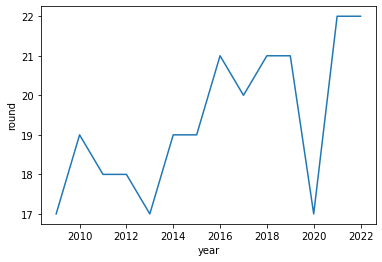

In [5]:
races = data["races"].copy()
manipulator.plot_data(races[races["circuitId"]==24], x_axis="year", y_axis="round")
data["races"].columns

In [6]:
data["results"].tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25655,25661,1086,825,210,20,13,16,16,16,0.0,69,\N,\N,37,15,1:23.511,188.856,11
25656,25662,1086,848,3,23,17,17,17,17,0.0,69,\N,\N,43,12,1:23.047,189.911,11
25657,25663,1086,849,3,6,19,18,18,18,0.0,69,\N,\N,60,8,1:22.478,191.221,11
25658,25664,1086,852,213,22,16,19,19,19,0.0,68,\N,\N,58,16,1:23.538,188.795,12
25659,25665,1086,822,51,77,8,20,20,20,0.0,65,\N,\N,60,19,1:24.002,187.752,131


In [7]:
data["drivers"].head(30)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528785 entries, 0 to 528784
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        528785 non-null  int64 
 1   driverId      528785 non-null  int64 
 2   lap           528785 non-null  int64 
 3   position      528785 non-null  int64 
 4   time          528785 non-null  object
 5   milliseconds  528785 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.2+ MB


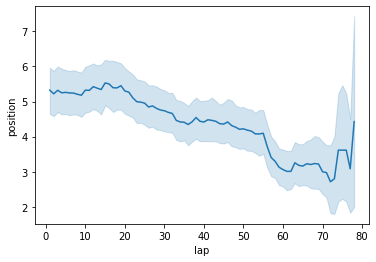

In [8]:
manipulator.plot_data(data["lap_times"][data["lap_times"]["driverId"]==30], x_axis="lap", y_axis="position")
data["lap_times"].info()

In [9]:
results_laps_df = pd.merge(data["results"], data["lap_times"], on=["raceId","driverId"])

In [10]:
results_laps_races_df = pd.merge(results_laps_df, data["races"], on=["raceId"])

In [12]:
manipulator = DataManipulation()
results_laps_races_df_datetime = manipulator.dt_inplace(results_laps_races_df, r'\N')

Columns to be converted --> ['time_x', 'time_y', 'time', 'fp1_time', 'fp2_time', 'fp3_time', 'quali_time', 'sprint_time', 'date', 'fp1_date', 'fp2_date', 'fp3_date', 'quali_date', 'sprint_date', 'milliseconds_x', 'milliseconds_y']
General Skywalker: Failure in data_to_dict() function at 'time_x' column.
Traceback (most recent call last):
  File "/home/marios/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py", line 2211, in objects_to_datetime64ns
    values, tz_parsed = conversion.datetime_to_datetime64(data.ravel("K"))
  File "pandas/_libs/tslibs/conversion.pyx", line 360, in pandas._libs.tslibs.conversion.datetime_to_datetime64
TypeError: Unrecognized value type: <class 'str'>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/marios/projects/Test_Project/formula-1-world-championship-1950-2020/../../tools/DataManipulation.py", line 125, in dt_inplace
    df_dt[c]=pd.to_datetime(df[c])
  File "/hom

In [21]:
results_laps_races_df_datetime.select_dtypes(include=['datetime64'])
np.unique(results_laps_races_df_datetime['sprint_time'])

array(['2022-09-27T14:30:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [22]:
results_laps_races_df_datetime.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,lap,position_y,year,round,circuitId
count,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000,528785.000000
mean,13553.150566,541.681793,277.785648,39.820842,10.749601,9.666479,3.795843,58.921297,7.541118,29.967802,9.650514,2009.694078,9.702437,18.237673
std,10298.828930,419.900529,370.144257,66.934676,6.216587,5.563437,5.989316,12.229162,12.521244,18.410254,5.541874,7.519150,5.369153,19.460900
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1996.000000,1.000000,1.000000
25%,2605.000000,126.000000,15.000000,4.000000,5.000000,5.000000,0.000000,53.000000,1.000000,14.000000,5.000000,2003.000000,5.000000,6.000000
50%,20691.000000,352.000000,35.000000,9.000000,11.000000,9.000000,0.000000,58.000000,2.000000,29.000000,9.000000,2010.000000,9.000000,12.000000
75%,23186.000000,960.000000,815.000000,21.000000,16.000000,14.000000,6.000000,69.000000,11.000000,44.000000,14.000000,2016.000000,14.000000,20.000000
max,25665.000000,1086.000000,855.000000,214.000000,24.000000,24.000000,50.000000,87.000000,141.000000,87.000000,24.000000,2022.000000,22.000000,79.000000


In [23]:
results_laps_races_df_datetime.head()

,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [24]:
data['drivers']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [34]:
hamilton_races = results_laps_races_df_datetime.loc[(results_laps_races_df_datetime['driverId']==1)]
hamilton_races

,resultId,raceId,driverId,constructorId,number,grid,position_x,positionText,positionOrder,points,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,1,18,1,1,22,1,1,1,1,10.0,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527538,25647,1086,1,131,44,7,2,2,2,19.0,...,2022-07-29,2022-09-27 12:00:00,2022-07-29,2022-09-27 15:00:00,2022-07-30,2022-09-27 11:00:00,2022-07-30,2022-09-27 14:00:00,NaT,NaT
527539,25647,1086,1,131,44,7,2,2,2,19.0,...,2022-07-29,2022-09-27 12:00:00,2022-07-29,2022-09-27 15:00:00,2022-07-30,2022-09-27 11:00:00,2022-07-30,2022-09-27 14:00:00,NaT,NaT
527540,25647,1086,1,131,44,7,2,2,2,19.0,...,2022-07-29,2022-09-27 12:00:00,2022-07-29,2022-09-27 15:00:00,2022-07-30,2022-09-27 11:00:00,2022-07-30,2022-09-27 14:00:00,NaT,NaT
527541,25647,1086,1,131,44,7,2,2,2,19.0,...,2022-07-29,2022-09-27 12:00:00,2022-07-29,2022-09-27 15:00:00,2022-07-30,2022-09-27 11:00:00,2022-07-30,2022-09-27 14:00:00,NaT,NaT


In [35]:
hamilton_races.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position_x', 'positionText', 'positionOrder', 'points', 'laps',
       'time_x', 'milliseconds_x', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'lap', 'position_y', 'time_y',
       'milliseconds_y', 'year', 'round', 'circuitId', 'name', 'date', 'time',
       'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date',
       'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [44]:
np.unique(hamilton_races['date'])

array(['2007-03-18T00:00:00.000000000', '2007-04-08T00:00:00.000000000',
       '2007-04-15T00:00:00.000000000', '2007-05-13T00:00:00.000000000',
       '2007-05-27T00:00:00.000000000', '2007-06-10T00:00:00.000000000',
       '2007-06-17T00:00:00.000000000', '2007-07-01T00:00:00.000000000',
       '2007-07-08T00:00:00.000000000', '2007-07-22T00:00:00.000000000',
       '2007-08-05T00:00:00.000000000', '2007-08-26T00:00:00.000000000',
       '2007-09-09T00:00:00.000000000', '2007-09-16T00:00:00.000000000',
       '2007-09-30T00:00:00.000000000', '2007-10-07T00:00:00.000000000',
       '2007-10-21T00:00:00.000000000', '2008-03-16T00:00:00.000000000',
       '2008-03-23T00:00:00.000000000', '2008-04-06T00:00:00.000000000',
       '2008-04-27T00:00:00.000000000', '2008-05-11T00:00:00.000000000',
       '2008-05-25T00:00:00.000000000', '2008-06-08T00:00:00.000000000',
       '2008-06-22T00:00:00.000000000', '2008-07-06T00:00:00.000000000',
       '2008-07-20T00:00:00.000000000', '2008-08-03

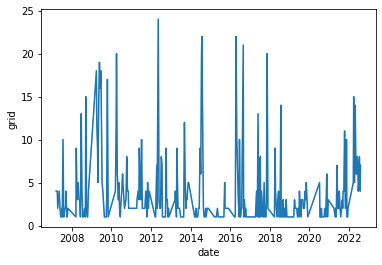

In [48]:
manipulator.plot_data(data=hamilton_races, x_axis='date', y_axis='grid')